In [1]:
## Experiment prompts from VGG to sam
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import json
from skimage.measure import label, regionprops
import glob
import os
from PIL import Image
import torch

import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(),'..'))

sys.path.append(parent_dir)

from segment_anything.utils.transforms import ResizeLongestSide


In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    




def prepare_image(image, transform):
    image = transform.apply_image(image)
    image = torch.as_tensor(image) 
    return image.permute(2, 0, 1).contiguous()


In [135]:
#image = cv2.imread('C:\\Users\\d42684\\Documents\\STAGE\\CODES\\ACtoolbox-main\\Dataset\\Small_ARIS_Mauzac\\TEST\\All_Originals\\2014-11-16_002000_t8_Obj_frame3065.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#2014-11-05_184000_t0_Obj_frame315.jpg
#2014-11-16_002000_t0_Obj_frame508.jpg

In [ ]:
# plt.figure(figsize=(10,10))
# plt.imshow(image)
# plt.axis('on')
# plt.show()


In [3]:

sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = r"C:\Users\chapi\Documents\STAGE\CODE\segment-anything-main\sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
#sam.to(device=device)

predictor = SamPredictor(sam)



File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1433.jpg
2212                    {"name":"point","cx":612,"cy":40}
2213    {"name":"rect","x":594,"y":20,"width":37,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[594  20 631  67]]
2014-11-17_132000_t0_Obj_frame1433.jpg
[0 1]


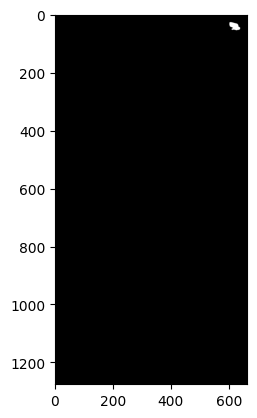

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1434.jpg
2214                    {"name":"point","cx":589,"cy":44}
2215    {"name":"rect","x":558,"y":19,"width":49,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[558  19 607  66]]
2014-11-17_132000_t0_Obj_frame1434.jpg
[0 1]


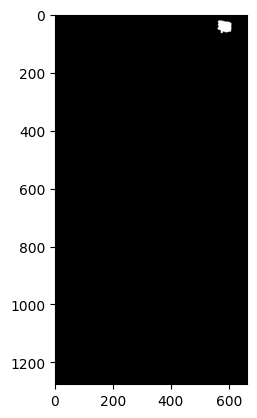

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1435.jpg
2216                    {"name":"point","cx":576,"cy":39}
2217    {"name":"rect","x":549,"y":19,"width":51,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[549  19 600  61]]
2014-11-17_132000_t0_Obj_frame1435.jpg
[0 1]


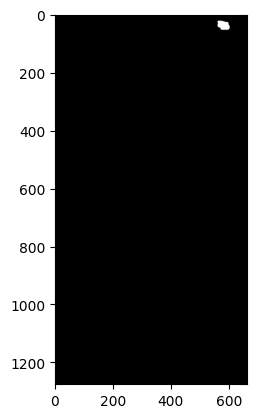

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1436.jpg
2218                    {"name":"point","cx":553,"cy":42}
2219    {"name":"rect","x":527,"y":11,"width":57,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[527  11 584  74]]
2014-11-17_132000_t0_Obj_frame1436.jpg
[0 1]


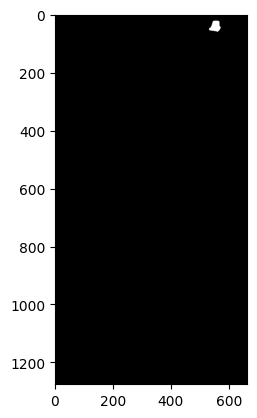

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1437.jpg
2220                    {"name":"point","cx":523,"cy":46}
2221    {"name":"rect","x":482,"y":25,"width":61,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[482  25 543  76]]
2014-11-17_132000_t0_Obj_frame1437.jpg
[0 1]


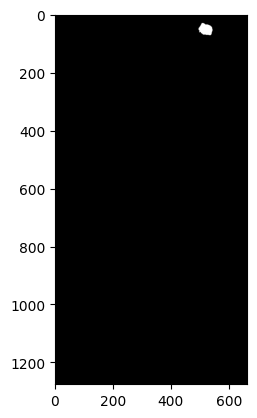

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1438.jpg
2222                    {"name":"point","cx":508,"cy":41}
2223    {"name":"rect","x":465,"y":17,"width":61,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[465  17 526  77]]
2014-11-17_132000_t0_Obj_frame1438.jpg
[0 1]


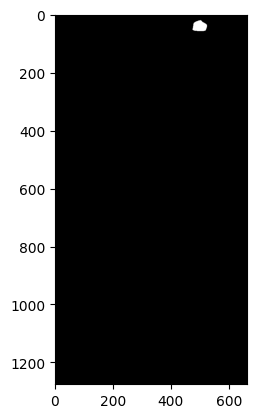

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1439.jpg
2224                    {"name":"point","cx":485,"cy":42}
2225    {"name":"rect","x":464,"y":20,"width":43,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[464  20 507  83]]
2014-11-17_132000_t0_Obj_frame1439.jpg
[0 1]


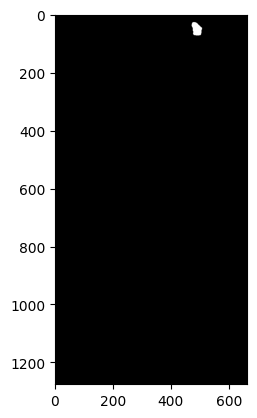

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1440.jpg
2226                    {"name":"point","cx":458,"cy":45}
2227    {"name":"rect","x":412,"y":10,"width":72,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[412  10 484  84]]
2014-11-17_132000_t0_Obj_frame1440.jpg
[0 1]


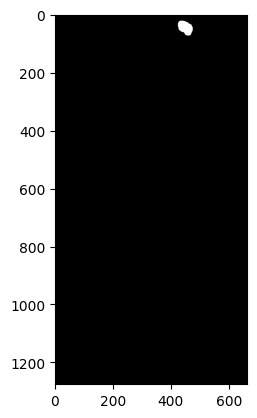

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1441.jpg
2228                    {"name":"point","cx":412,"cy":42}
2229    {"name":"rect","x":367,"y":8,"width":60,"heigh...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[367   8 427  90]]
2014-11-17_132000_t0_Obj_frame1441.jpg
[0 1]


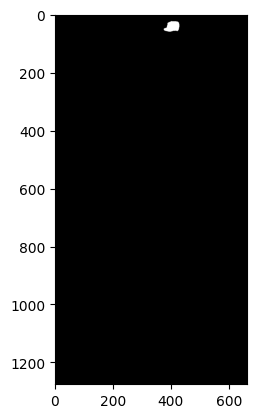

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1442.jpg
2230                    {"name":"point","cx":394,"cy":42}
2231    {"name":"rect","x":363,"y":19,"width":64,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[363  19 427  86]]
2014-11-17_132000_t0_Obj_frame1442.jpg
[0 1]


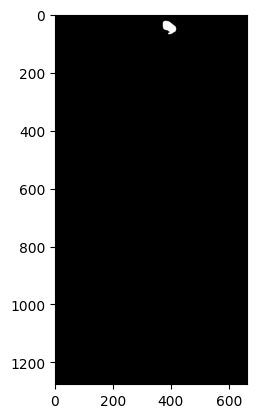

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1443.jpg
2232                    {"name":"point","cx":375,"cy":50}
2233    {"name":"rect","x":342,"y":15,"width":54,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[342  15 396  88]]
2014-11-17_132000_t0_Obj_frame1443.jpg
[0 1]


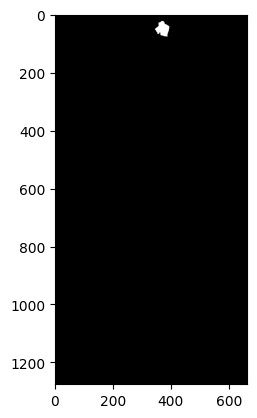

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1444.jpg
2234                    {"name":"point","cx":362,"cy":43}
2235    {"name":"rect","x":320,"y":16,"width":68,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[320  16 388  86]]
2014-11-17_132000_t0_Obj_frame1444.jpg
[0 1]


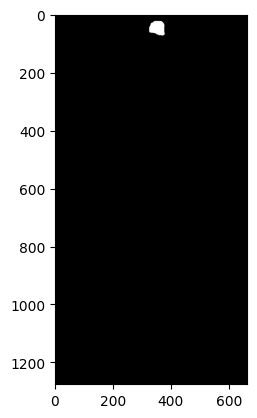

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1445.jpg
2236                    {"name":"point","cx":344,"cy":46}
2237    {"name":"rect","x":301,"y":22,"width":68,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[301  22 369  91]]
2014-11-17_132000_t0_Obj_frame1445.jpg
[0 1]


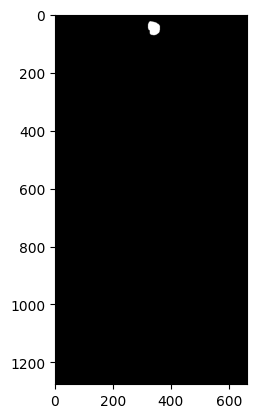

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1447.jpg
2238                    {"name":"point","cx":313,"cy":42}
2239    {"name":"rect","x":267,"y":17,"width":75,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[267  17 342 100]]
2014-11-17_132000_t0_Obj_frame1447.jpg
[0 1]


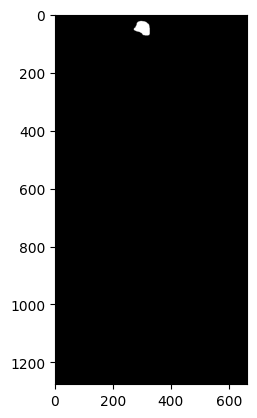

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1448.jpg
2240                    {"name":"point","cx":285,"cy":45}
2241    {"name":"rect","x":252,"y":17,"width":64,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[252  17 316  89]]
2014-11-17_132000_t0_Obj_frame1448.jpg
[0 1]


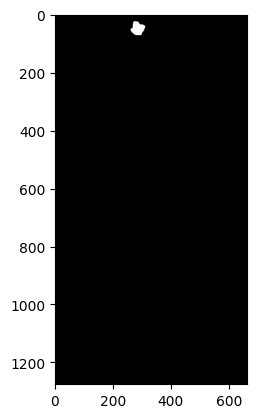

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1450.jpg
2242                    {"name":"point","cx":253,"cy":42}
2243    {"name":"rect","x":207,"y":22,"width":79,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[207  22 286  88]]
2014-11-17_132000_t0_Obj_frame1450.jpg
[0 1]


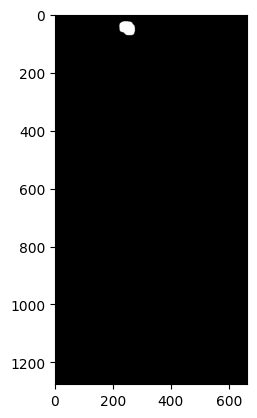

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1451.jpg
2244                    {"name":"point","cx":233,"cy":48}
2245    {"name":"rect","x":204,"y":19,"width":51,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[204  19 255  88]]
2014-11-17_132000_t0_Obj_frame1451.jpg
[0 1]


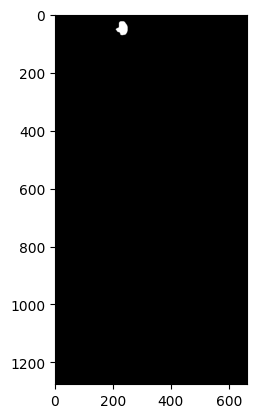

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1453.jpg
2246                    {"name":"point","cx":198,"cy":42}
2247    {"name":"rect","x":166,"y":21,"width":60,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[166  21 226  98]]
2014-11-17_132000_t0_Obj_frame1453.jpg
[0 1]


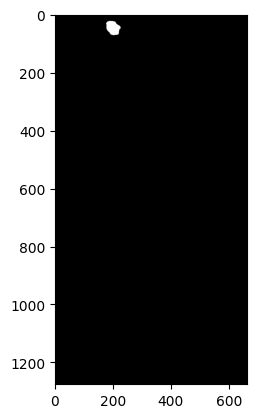

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1455.jpg
2248                    {"name":"point","cx":170,"cy":43}
2249    {"name":"rect","x":137,"y":23,"width":68,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[137  23 205  97]]
2014-11-17_132000_t0_Obj_frame1455.jpg
[0 1]


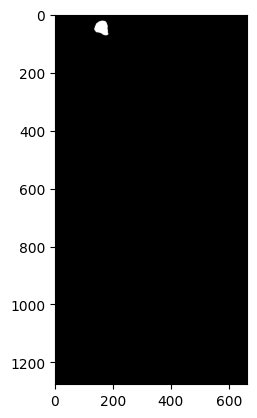

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1456.jpg
2250                    {"name":"point","cx":150,"cy":42}
2251    {"name":"rect","x":117,"y":19,"width":57,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[117  19 174  88]]
2014-11-17_132000_t0_Obj_frame1456.jpg
[0 1]


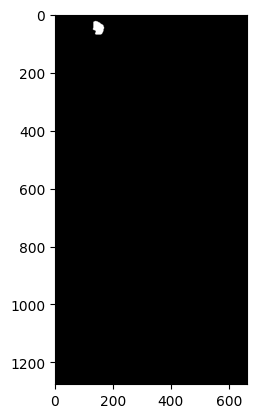

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1457.jpg
2252                    {"name":"point","cx":130,"cy":45}
2253    {"name":"rect","x":82,"y":27,"width":73,"heigh...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[ 82  27 155  82]]
2014-11-17_132000_t0_Obj_frame1457.jpg
[0 1]


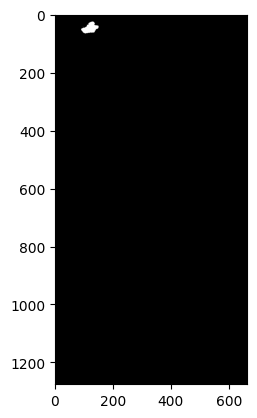

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1458.jpg
2254                    {"name":"point","cx":122,"cy":44}
2255    {"name":"rect","x":91,"y":15,"width":60,"heigh...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[ 91  15 151  76]]
2014-11-17_132000_t0_Obj_frame1458.jpg
[0 1]


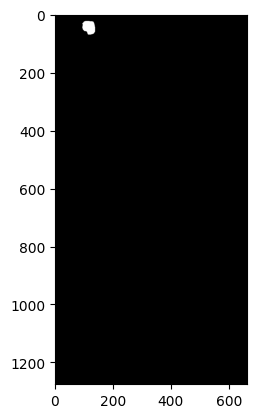

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1460.jpg
2256                     {"name":"point","cx":87,"cy":40}
2257    {"name":"rect","x":56,"y":20,"width":52,"heigh...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[ 56  20 108  81]]
2014-11-17_132000_t0_Obj_frame1460.jpg
[0 1]


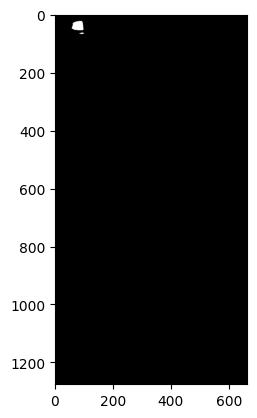

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t0_Obj_frame1461.jpg
2258                     {"name":"point","cx":70,"cy":45}
2259    {"name":"rect","x":43,"y":24,"width":49,"heigh...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[43 24 92 78]]
2014-11-17_132000_t0_Obj_frame1461.jpg
[0 1]


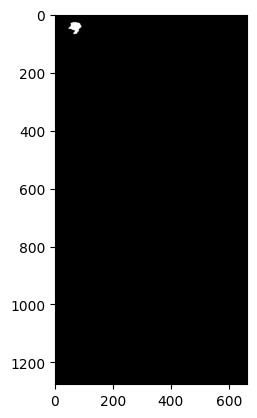

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t1_Obj_frame1868.jpg
2354                   {"name":"point","cx":566,"cy":150}
2355    {"name":"rect","x":536,"y":125,"width":48,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[536 125 584 176]]
2014-11-17_132000_t1_Obj_frame1868.jpg
[0 1]


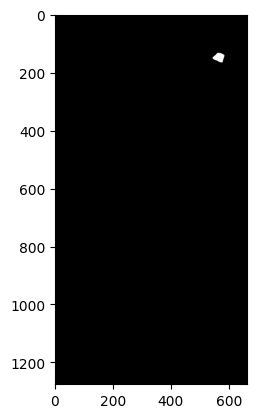

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t1_Obj_frame1869.jpg
2356                   {"name":"point","cx":530,"cy":149}
2357    {"name":"rect","x":496,"y":128,"width":45,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[496 128 541 167]]
2014-11-17_132000_t1_Obj_frame1869.jpg
[0 1]


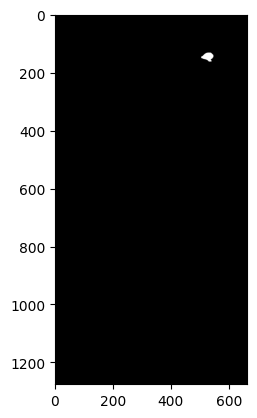

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t1_Obj_frame1871.jpg
2359                   {"name":"point","cx":489,"cy":149}
2360    {"name":"rect","x":469,"y":127,"width":42,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[469 127 511 169]]
2014-11-17_132000_t1_Obj_frame1871.jpg
[0 1]


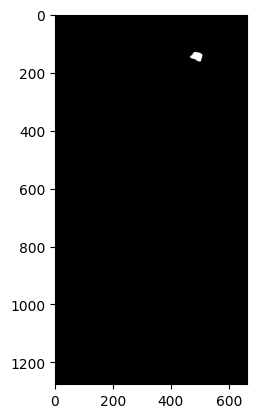

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t1_Obj_frame1872.jpg
2361                   {"name":"point","cx":557,"cy":321}
2362                   {"name":"point","cx":450,"cy":149}
2363    {"name":"rect","x":409,"y":112,"width":74,"hei...
2364    {"name":"rect","x":526,"y":287,"width":52,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
Trash
[[409 112 483 176]
 [526 287 578 344]]
2014-11-17_132000_t1_Obj_frame1872.jpg
[0 1]


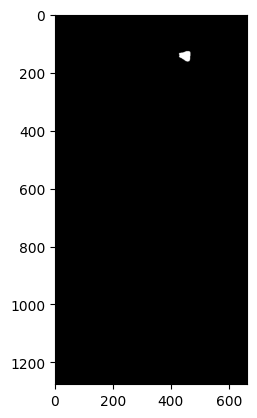

wait
2014-11-17_132000_t1_Obj_frame1872.jpg
[0 1]


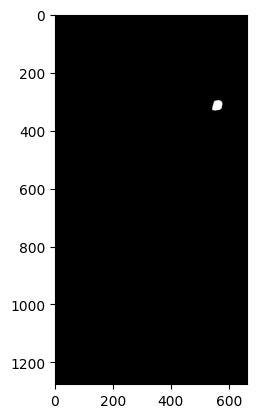

wait
File attributes (regions):
2
image atributes: 
2014-11-17_132000_t1_Obj_frame1873.jpg
2365                   {"name":"point","cx":424,"cy":144}
2366                   {"name":"point","cx":536,"cy":318}
2367    {"name":"rect","x":500,"y":283,"width":51,"hei...
2368    {"name":"rect","x":405,"y":118,"width":60,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
Trash
[[500 283 551 357]
 [405 118 465 194]]
2014-11-17_132000_t1_Obj_frame1873.jpg
[0 1]


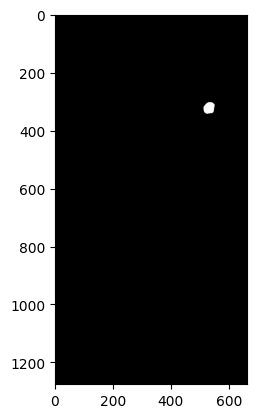

wait
2014-11-17_132000_t1_Obj_frame1873.jpg
[0 1]


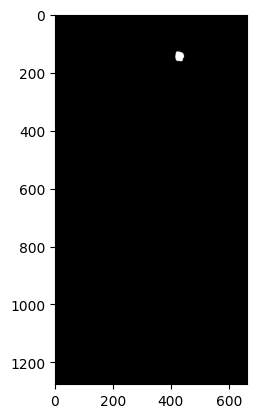

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t1_Obj_frame1874.jpg
2369                   {"name":"point","cx":481,"cy":318}
2370    {"name":"rect","x":457,"y":294,"width":47,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[457 294 504 339]]
2014-11-17_132000_t1_Obj_frame1874.jpg
[0 1]


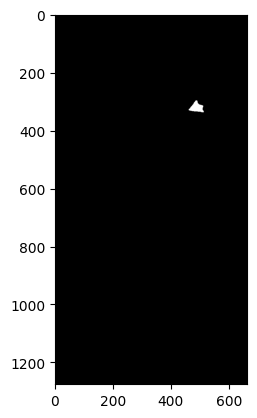

wait
File attributes (regions):
2
image atributes: 
2014-11-17_132000_t1_Obj_frame1875.jpg
2371                   {"name":"point","cx":352,"cy":146}
2372                   {"name":"point","cx":470,"cy":321}
2373    {"name":"rect","x":430,"y":293,"width":58,"hei...
2374    {"name":"rect","x":323,"y":118,"width":52,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
Trash
[[430 293 488 341]
 [323 118 375 156]]
2014-11-17_132000_t1_Obj_frame1875.jpg
[0 1]


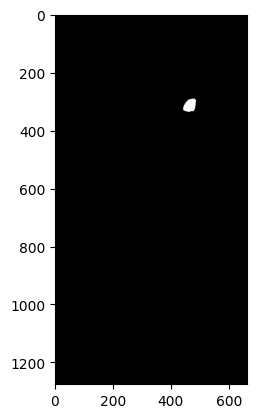

wait
2014-11-17_132000_t1_Obj_frame1875.jpg
[0 1]


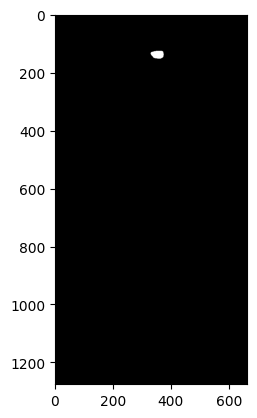

wait
File attributes (regions):
2
image atributes: 
2014-11-17_132000_t1_Obj_frame1877.jpg
2375                   {"name":"point","cx":318,"cy":144}
2376                   {"name":"point","cx":433,"cy":318}
2377    {"name":"rect","x":297,"y":125,"width":29,"hei...
2378    {"name":"rect","x":403,"y":288,"width":48,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
Trash
[[297 125 326 158]
 [403 288 451 342]]
2014-11-17_132000_t1_Obj_frame1877.jpg
[0 1]


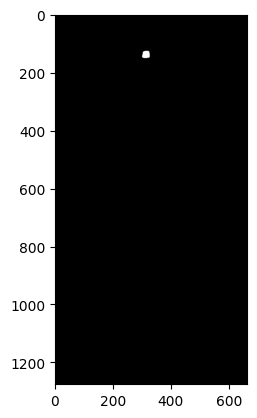

wait
2014-11-17_132000_t1_Obj_frame1877.jpg
[0 1]


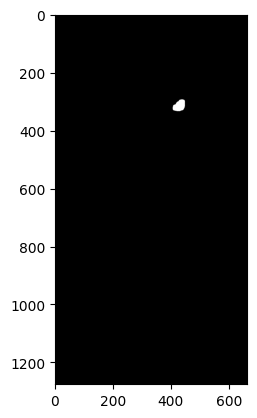

wait
File attributes (regions):
2
image atributes: 
2014-11-17_132000_t1_Obj_frame1878.jpg
2379                   {"name":"point","cx":298,"cy":143}
2380                   {"name":"point","cx":415,"cy":318}
2381    {"name":"rect","x":269,"y":121,"width":51,"hei...
2382    {"name":"rect","x":394,"y":287,"width":63,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
Trash
[[269 121 320 163]
 [394 287 457 344]]
2014-11-17_132000_t1_Obj_frame1878.jpg
[0 1]


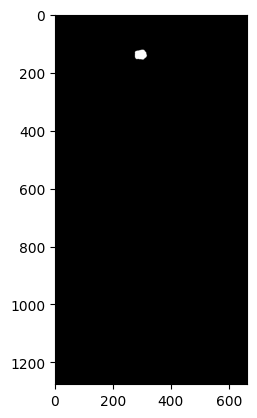

wait
2014-11-17_132000_t1_Obj_frame1878.jpg
[0 1]


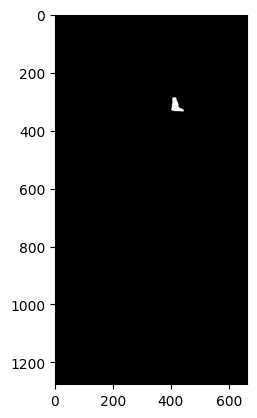

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t1_Obj_frame1879.jpg
2383                   {"name":"point","cx":401,"cy":320}
2384    {"name":"rect","x":362,"y":278,"width":59,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[362 278 421 344]]
2014-11-17_132000_t1_Obj_frame1879.jpg
[0 1]


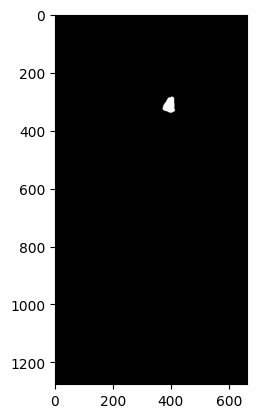

wait
File attributes (regions):
2
image atributes: 
2014-11-17_132000_t1_Obj_frame1880.jpg
2385                   {"name":"point","cx":263,"cy":138}
2386                   {"name":"point","cx":377,"cy":321}
2387    {"name":"rect","x":232,"y":117,"width":56,"hei...
2388    {"name":"rect","x":353,"y":283,"width":44,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
Trash
[[232 117 288 158]
 [353 283 397 341]]
2014-11-17_132000_t1_Obj_frame1880.jpg
[0 1]


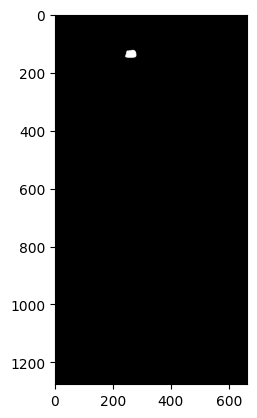

wait
2014-11-17_132000_t1_Obj_frame1880.jpg
[0 1]


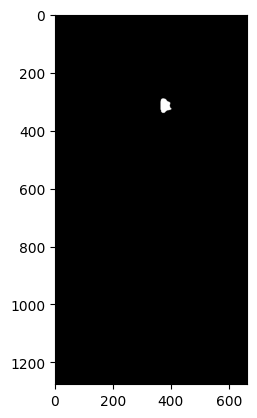

wait
File attributes (regions):
2
image atributes: 
2014-11-17_132000_t1_Obj_frame1881.jpg
2389                   {"name":"point","cx":240,"cy":134}
2390                   {"name":"point","cx":360,"cy":312}
2391    {"name":"rect","x":211,"y":112,"width":53,"hei...
2392    {"name":"rect","x":332,"y":297,"width":52,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
Trash
[[211 112 264 150]
 [332 297 384 339]]
2014-11-17_132000_t1_Obj_frame1881.jpg
[0 1]


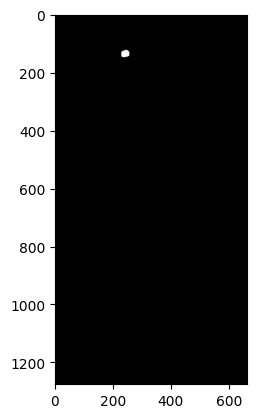

wait
2014-11-17_132000_t1_Obj_frame1881.jpg
[0 1]


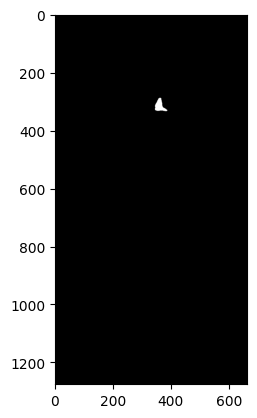

wait
File attributes (regions):
2
image atributes: 
2014-11-17_132000_t1_Obj_frame1882.jpg
2393                   {"name":"point","cx":341,"cy":317}
2394                   {"name":"point","cx":228,"cy":140}
2395    {"name":"rect","x":201,"y":120,"width":42,"hei...
2396    {"name":"rect","x":312,"y":287,"width":63,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
Trash
[[201 120 243 155]
 [312 287 375 337]]
2014-11-17_132000_t1_Obj_frame1882.jpg
[0 1]


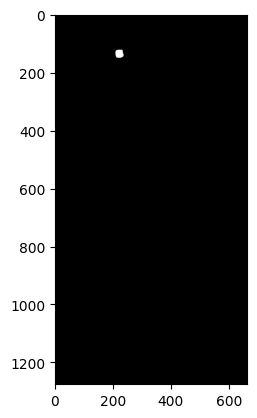

wait
2014-11-17_132000_t1_Obj_frame1882.jpg
[0 1]


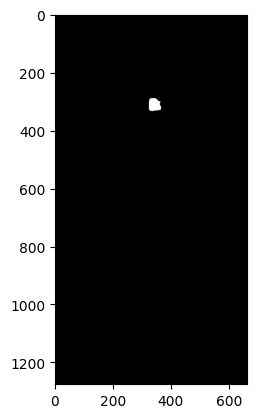

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t1_Obj_frame1884.jpg
2397                   {"name":"point","cx":311,"cy":315}
2398    {"name":"rect","x":284,"y":284,"width":48,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[284 284 332 340]]
2014-11-17_132000_t1_Obj_frame1884.jpg
[0 1]


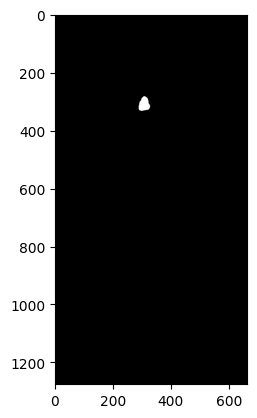

wait
File attributes (regions):
2
image atributes: 
2014-11-17_132000_t1_Obj_frame1886.jpg
2399                   {"name":"point","cx":154,"cy":128}
2400                   {"name":"point","cx":279,"cy":315}
2401    {"name":"rect","x":131,"y":106,"width":45,"hei...
2402    {"name":"rect","x":248,"y":282,"width":48,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
Trash
[[131 106 176 148]
 [248 282 296 335]]
2014-11-17_132000_t1_Obj_frame1886.jpg
[0 1]


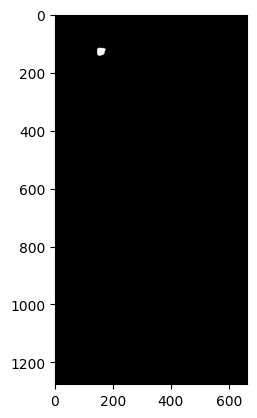

wait
2014-11-17_132000_t1_Obj_frame1886.jpg
[0 1]


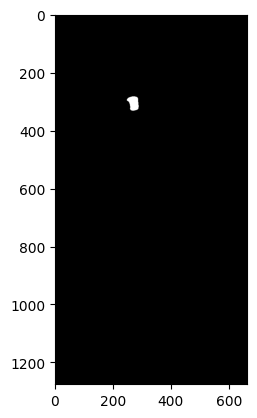

wait
File attributes (regions):
2
image atributes: 
2014-11-17_132000_t1_Obj_frame1888.jpg
2403                   {"name":"point","cx":119,"cy":137}
2404                   {"name":"point","cx":241,"cy":315}
2405    {"name":"rect","x":211,"y":284,"width":56,"hei...
2406    {"name":"rect","x":103,"y":115,"width":34,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
Trash
[[211 284 267 338]
 [103 115 137 144]]
2014-11-17_132000_t1_Obj_frame1888.jpg
[0 1]


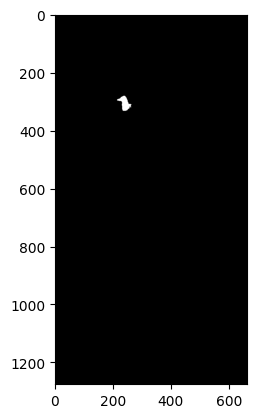

wait
2014-11-17_132000_t1_Obj_frame1888.jpg
[0 1]


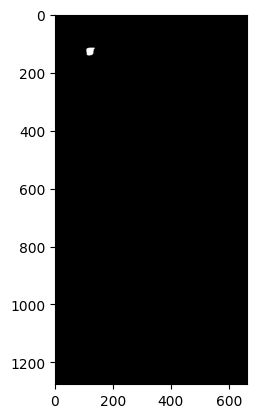

wait
File attributes (regions):
2
image atributes: 
2014-11-17_132000_t1_Obj_frame1889.jpg
2407                   {"name":"point","cx":226,"cy":305}
2408                   {"name":"point","cx":108,"cy":140}
2409    {"name":"rect","x":81,"y":121,"width":54,"heig...
2410    {"name":"rect","x":188,"y":278,"width":62,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
Trash
[[ 81 121 135 149]
 [188 278 250 332]]
2014-11-17_132000_t1_Obj_frame1889.jpg
[0 1]


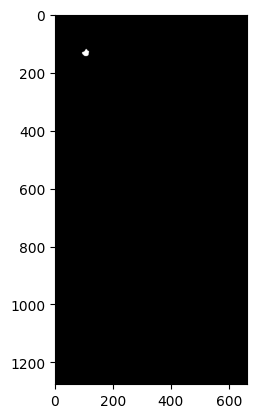

wait
2014-11-17_132000_t1_Obj_frame1889.jpg
[0 1]


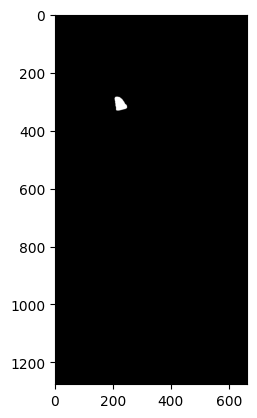

wait
File attributes (regions):
2
image atributes: 
2014-11-17_132000_t1_Obj_frame1890.jpg
2411                   {"name":"point","cx":195,"cy":306}
2412                    {"name":"point","cx":77,"cy":140}
2413    {"name":"rect","x":47,"y":116,"width":54,"heig...
2414    {"name":"rect","x":158,"y":275,"width":55,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
Trash
[[ 47 116 101 152]
 [158 275 213 335]]
2014-11-17_132000_t1_Obj_frame1890.jpg
[0 1]


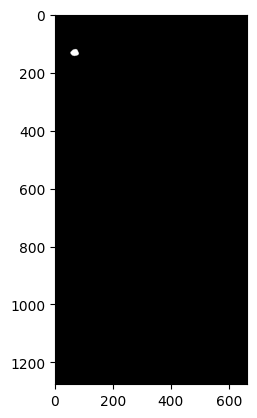

wait
2014-11-17_132000_t1_Obj_frame1890.jpg
[0 1]


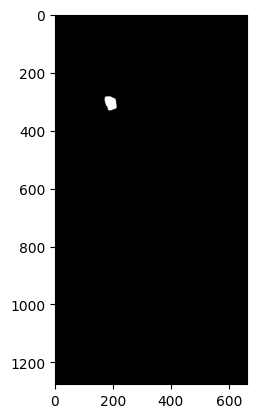

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t1_Obj_frame1891.jpg
2415    {"name":"rect","x":127,"y":273,"width":68,"hei...
2416                   {"name":"point","cx":163,"cy":309}
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[127 273 195 345]]
2014-11-17_132000_t1_Obj_frame1891.jpg
[0 1]


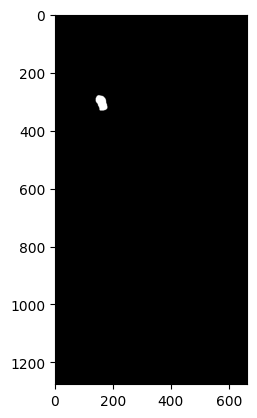

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t1_Obj_frame1893.jpg
2417                   {"name":"point","cx":129,"cy":303}
2418    {"name":"rect","x":100,"y":279,"width":58,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[100 279 158 339]]
2014-11-17_132000_t1_Obj_frame1893.jpg
[0 1]


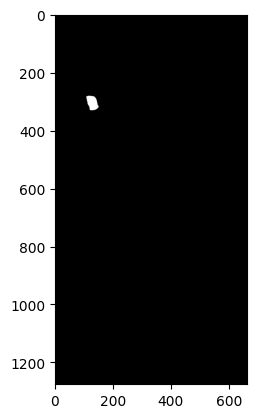

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t1_Obj_frame1894.jpg
2419                   {"name":"point","cx":124,"cy":313}
2420    {"name":"rect","x":90,"y":287,"width":57,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[ 90 287 147 341]]
2014-11-17_132000_t1_Obj_frame1894.jpg
[0 1]


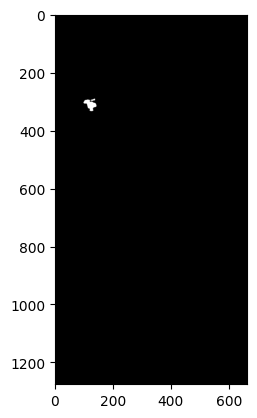

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t1_Obj_frame1895.jpg
2421                    {"name":"point","cx":99,"cy":297}
2422    {"name":"rect","x":72,"y":278,"width":57,"heig...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[ 72 278 129 335]]
2014-11-17_132000_t1_Obj_frame1895.jpg
[0 1]


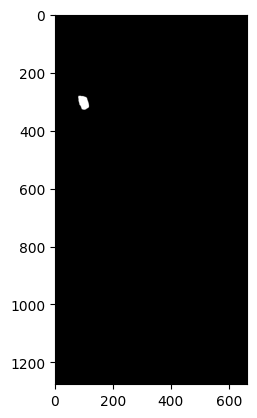

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t2_Obj_frame2728.jpg
2523                   {"name":"point","cx":454,"cy":790}
2524    {"name":"rect","x":421,"y":767,"width":59,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[421 767 480 815]]
2014-11-17_132000_t2_Obj_frame2728.jpg
[0 1]


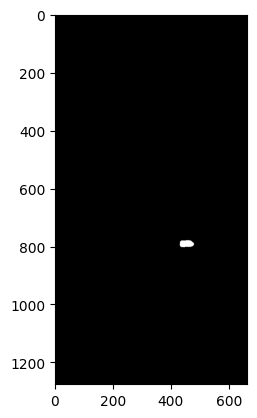

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t2_Obj_frame2729.jpg
2525                   {"name":"point","cx":433,"cy":790}
2526    {"name":"rect","x":392,"y":768,"width":77,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[392 768 469 813]]
2014-11-17_132000_t2_Obj_frame2729.jpg
[0 1]


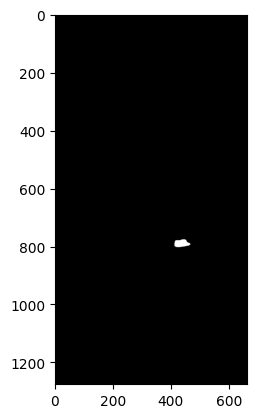

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t2_Obj_frame2732.jpg
2527                   {"name":"point","cx":362,"cy":785}
2528    {"name":"rect","x":309,"y":761,"width":86,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[309 761 395 806]]
2014-11-17_132000_t2_Obj_frame2732.jpg
[0 1]


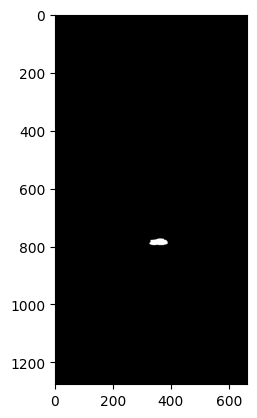

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t2_Obj_frame2734.jpg
2529                   {"name":"point","cx":334,"cy":785}
2530    {"name":"rect","x":277,"y":762,"width":88,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[277 762 365 802]]
2014-11-17_132000_t2_Obj_frame2734.jpg
[0 1]


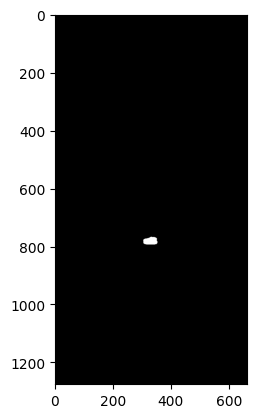

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t2_Obj_frame2735.jpg
2531                   {"name":"point","cx":315,"cy":785}
2532    {"name":"rect","x":255,"y":761,"width":84,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[255 761 339 811]]
2014-11-17_132000_t2_Obj_frame2735.jpg
[0 1]


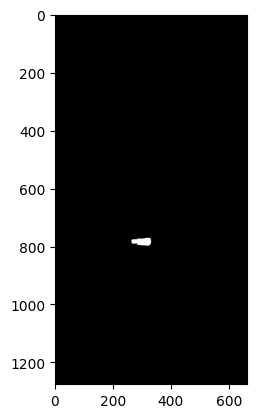

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t2_Obj_frame2738.jpg
2533                   {"name":"point","cx":260,"cy":786}
2534    {"name":"rect","x":229,"y":762,"width":58,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[229 762 287 801]]
2014-11-17_132000_t2_Obj_frame2738.jpg
[0 1]


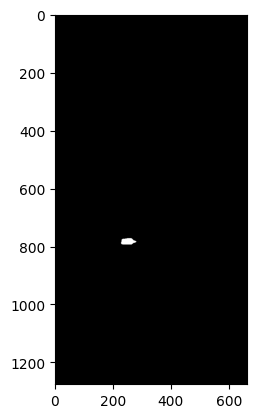

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t2_Obj_frame2739.jpg
2535                   {"name":"point","cx":253,"cy":785}
2536    {"name":"rect","x":205,"y":761,"width":65,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[205 761 270 803]]
2014-11-17_132000_t2_Obj_frame2739.jpg
[0 1]


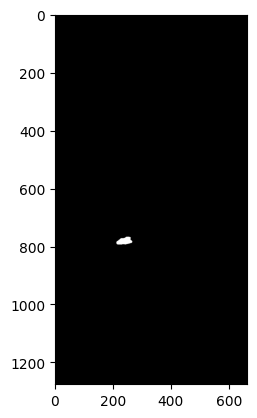

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t2_Obj_frame2740.jpg
2537                   {"name":"point","cx":230,"cy":782}
2538    {"name":"rect","x":189,"y":761,"width":60,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[189 761 249 801]]
2014-11-17_132000_t2_Obj_frame2740.jpg
[0 1]


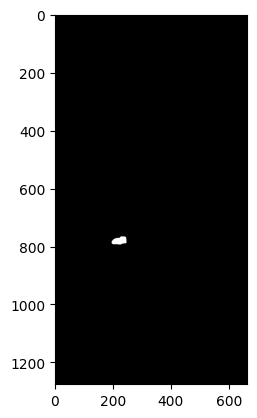

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t2_Obj_frame2741.jpg
2539                   {"name":"point","cx":211,"cy":781}
2540    {"name":"rect","x":172,"y":761,"width":62,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[172 761 234 801]]
2014-11-17_132000_t2_Obj_frame2741.jpg
[0 1]


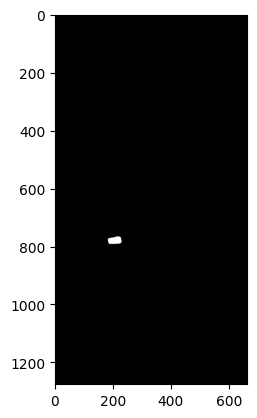

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3623.jpg
2641                   {"name":"point","cx":497,"cy":656}
2642    {"name":"rect","x":430,"y":633,"width":101,"he...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[430 633 531 682]]
2014-11-17_132000_t3_Obj_frame3623.jpg
[0 1]


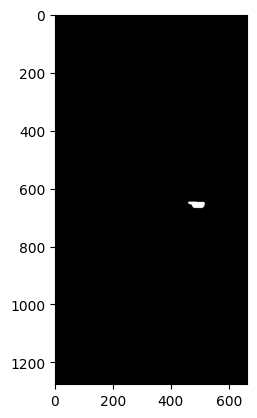

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3624.jpg
2643                   {"name":"point","cx":468,"cy":658}
2644    {"name":"rect","x":415,"y":623,"width":102,"he...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[415 623 517 692]]
2014-11-17_132000_t3_Obj_frame3624.jpg
[0 1]


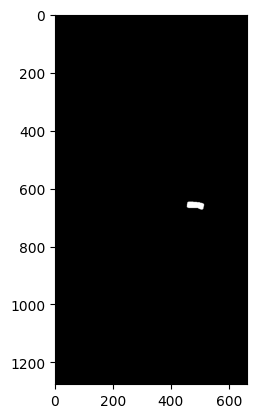

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3625.jpg
2645                   {"name":"point","cx":445,"cy":658}
2646    {"name":"rect","x":390,"y":629,"width":94,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[390 629 484 681]]
2014-11-17_132000_t3_Obj_frame3625.jpg
[0 1]


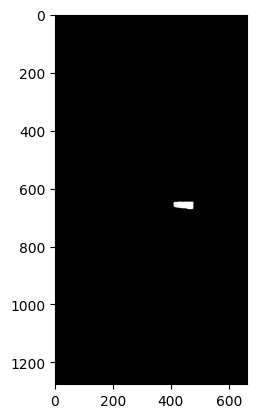

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3626.jpg
2647                   {"name":"point","cx":417,"cy":658}
2648    {"name":"rect","x":366,"y":638,"width":109,"he...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[366 638 475 685]]
2014-11-17_132000_t3_Obj_frame3626.jpg
[0 1]


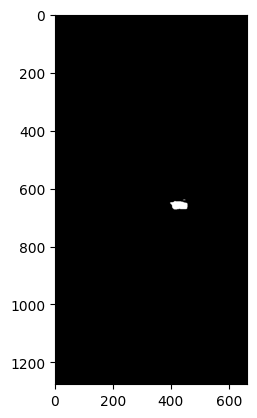

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3627.jpg
2649                   {"name":"point","cx":393,"cy":658}
2650    {"name":"rect","x":358,"y":625,"width":83,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[358 625 441 677]]
2014-11-17_132000_t3_Obj_frame3627.jpg
[0 1]


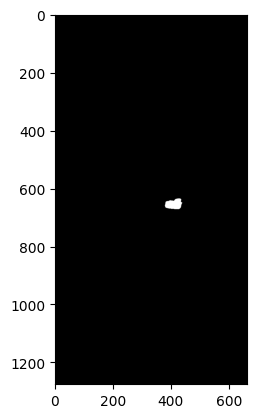

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3628.jpg
2651                   {"name":"point","cx":373,"cy":655}
2652    {"name":"rect","x":324,"y":620,"width":111,"he...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[324 620 435 675]]
2014-11-17_132000_t3_Obj_frame3628.jpg
[0 1]


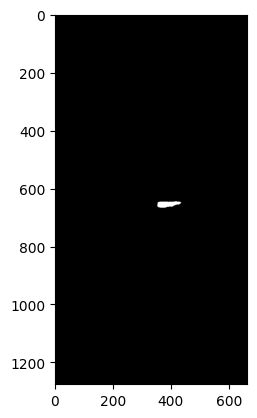

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3629.jpg
2653                   {"name":"point","cx":367,"cy":655}
2654    {"name":"rect","x":321,"y":635,"width":104,"he...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[321 635 425 683]]
2014-11-17_132000_t3_Obj_frame3629.jpg
[0 1]


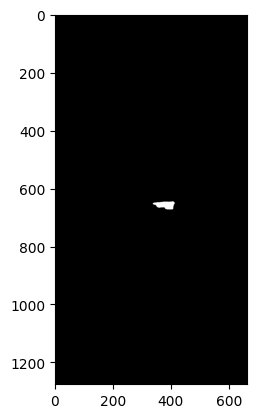

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3630.jpg
2655                   {"name":"point","cx":341,"cy":659}
2656    {"name":"rect","x":304,"y":625,"width":87,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[304 625 391 680]]
2014-11-17_132000_t3_Obj_frame3630.jpg
[0 1]


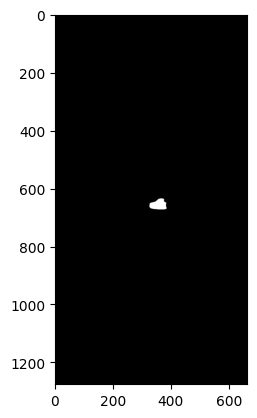

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3631.jpg
2657                   {"name":"point","cx":325,"cy":655}
2658    {"name":"rect","x":267,"y":629,"width":111,"he...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[267 629 378 677]]
2014-11-17_132000_t3_Obj_frame3631.jpg
[0 1]


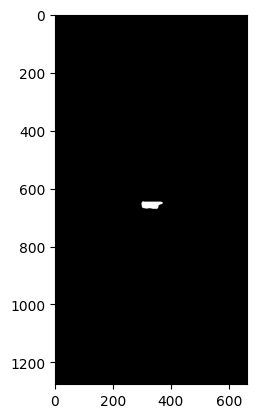

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3632.jpg
2659                   {"name":"point","cx":309,"cy":656}
2660    {"name":"rect","x":265,"y":635,"width":93,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[265 635 358 680]]
2014-11-17_132000_t3_Obj_frame3632.jpg
[0 1]


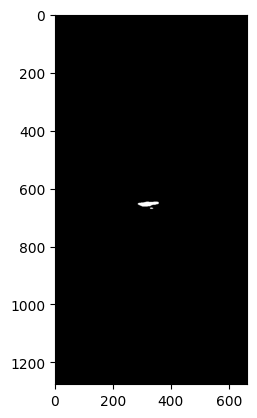

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3633.jpg
2661                   {"name":"point","cx":289,"cy":661}
2662    {"name":"rect","x":254,"y":625,"width":77,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[254 625 331 680]]
2014-11-17_132000_t3_Obj_frame3633.jpg
[0 1]


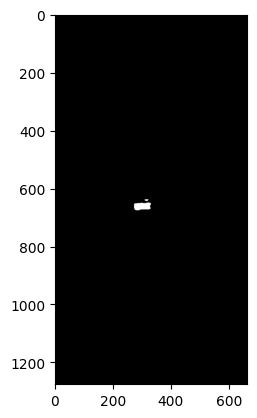

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3634.jpg
2663                   {"name":"point","cx":270,"cy":657}
2664    {"name":"rect","x":234,"y":643,"width":96,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[234 643 330 686]]
2014-11-17_132000_t3_Obj_frame3634.jpg
[0 1]


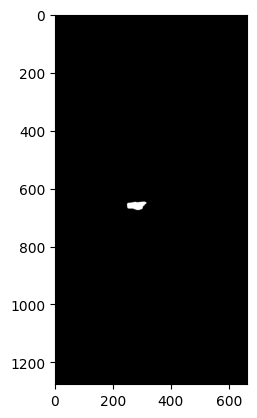

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3635.jpg
2665                   {"name":"point","cx":262,"cy":657}
2666    {"name":"rect","x":219,"y":639,"width":70,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[219 639 289 670]]
2014-11-17_132000_t3_Obj_frame3635.jpg
[0 1]


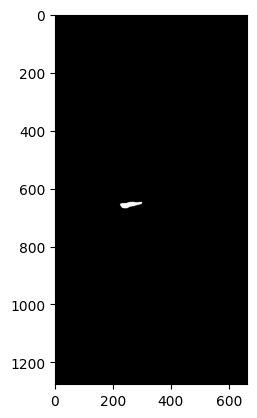

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3636.jpg
2667                   {"name":"point","cx":232,"cy":661}
2668    {"name":"rect","x":194,"y":630,"width":96,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[194 630 290 685]]
2014-11-17_132000_t3_Obj_frame3636.jpg
[0 1]


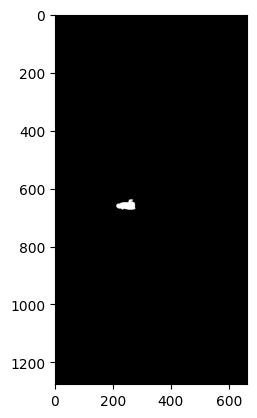

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3637.jpg
2669                   {"name":"point","cx":217,"cy":663}
2670    {"name":"rect","x":194,"y":645,"width":65,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[194 645 259 675]]
2014-11-17_132000_t3_Obj_frame3637.jpg
[0 1]


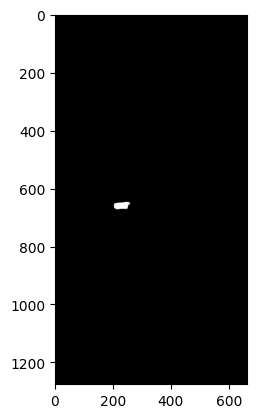

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3638.jpg
2671                   {"name":"point","cx":206,"cy":659}
2672    {"name":"rect","x":163,"y":638,"width":96,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[163 638 259 686]]
2014-11-17_132000_t3_Obj_frame3638.jpg
[0 1]


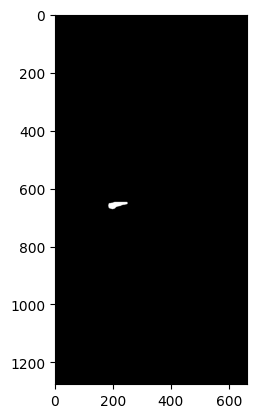

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3639.jpg
2673                   {"name":"point","cx":202,"cy":654}
2674    {"name":"rect","x":155,"y":636,"width":78,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[155 636 233 678]]
2014-11-17_132000_t3_Obj_frame3639.jpg
[0 1]


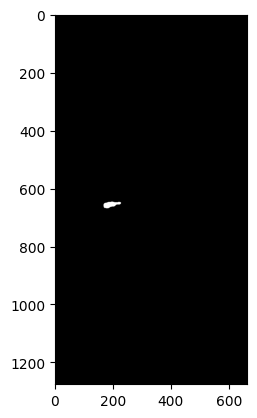

wait
File attributes (regions):
1
image atributes: 
2014-11-17_132000_t3_Obj_frame3640.jpg
2675                   {"name":"point","cx":188,"cy":656}
2676    {"name":"rect","x":143,"y":628,"width":86,"hei...
Name: region_shape_attributes, dtype: object
-----------------------------------------
Trash
[[143 628 229 683]]
2014-11-17_132000_t3_Obj_frame3640.jpg
[0 1]


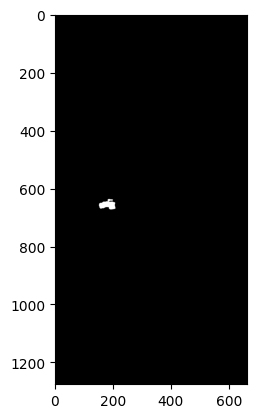

wait


In [29]:
ImageList = glob.glob(os.path.join(r'C:\Users\chapi\Documents\STAGE\CODE\bgslibrary\SELECTED ORIGINAL IMAGES\*.jpg'))
#C:\Users\d42684\Documents\STAGE\CODES\ACtoolbox-main\Dataset\Small_ARIS_SELUNE\2019-05-02_005000.avi\False Negatives\SIL_1
#ImageList = glob.glob(os.path.join('C:\\Users\\d42684\\Documents\\STAGE\\CODES\\ACtoolbox-main\\Dataset\\Small_ARIS_Mauzac\\TEST\\All_Originals\\*.jpg'))

df = pd.read_csv(r'C:\Users\chapi\Documents\STAGE\CODE\bgslibrary\updateddf.csv')
#df = pd.read_csv(r'C:\Users\chapi\Documents\STAGE\CODE\segment-anything-main\notebooks\SecondVersion_Annotations_Filled.csv')
#C:\Users\chapi\Documents\STAGE\CODE\bgslibrary\updateddf.csv
filtered_df0 = df[df['file_attributes'] != '{"Object_Count":"0"}']

# 2014-11-17_132000_t0_Obj_frame1348    CONTINUE AFTER THIS ONE
for imagepath in ImageList: # Puedo optimizar al directamente eliminar todos los que tienen region 0

    imageName = imagepath.split('\\')[-1]


    filtered_df = filtered_df0[filtered_df0['filename'] == imageName]

    # Check if filtered_df is empty
    if filtered_df.empty:
        continue  # Skip this iteration if no matches found



    print("File attributes (regions):")
    print(json.loads(filtered_df.iloc[0]['file_attributes'])['Object_Count'])



    image = cv2.imread(imagepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    predictor.set_image(image)


    
    print("image atributes: ")
    print(imageName)
    print(filtered_df["region_shape_attributes"])
    print('-----------------------------------------')

    cx = []
    cy = []

    x0 = []
    y0 = []
    y1 = []
    x1 = []
    classname = []
    for i in range(len(filtered_df)):

        info = json.loads(filtered_df.iloc[i]['region_shape_attributes'])
        class_info = json.loads(filtered_df.iloc[i]['region_attributes'])
        if info['name'] == 'point':

            cx.append(info['cx'])
            cy.append(info['cy'])
            #print(f"Point - cx: {cx}, cy: {cy}")

        elif info['name'] == 'rect':
            # Process rectangle information
            x0.append(info['x'])
            y0.append(info['y'])
            x1.append(int(info['x']) + int(info['width']))
            y1.append(int(info['y']) + int(info['height']))
            classname.append(class_info["Object"])
            print(class_info["Object"])
            #print(f"Rectangle - x: {x0}, y: {y0}, x1: {x1}, y1: {y1}")
            #print('wait')
    
    
    Points_array = np.column_stack((np.array(cx), np.array(cy)))
    Bbox_array = np.column_stack((x0, y0, x1, y1))

    print(np.column_stack((x0, y0, x1, y1)))


    ### Set up the loop for several objects using bbox to separate points
    Objects = 0
    for bbox in Bbox_array:

        
        SingleObject_Points = []
        for point in Points_array:

            x, y = point
            x_min, y_min, x_max, y_max = bbox
            # para los small fish, como la manera en la que se guardan bbox y puntos, no dice a cual corresponde, toca limitarlos
            
            if x_min <= x <= x_max and y_min <= y <= y_max:
                SingleObject_Points.append(point)

        # Se hacen predicciones individuales apra casos en los aue haya mas de un objeto  de interes en la imagen, mayormente parea los casos smallfish
        input_label = np.ones(len(SingleObject_Points))
        print(imageName)
        masks, _, _ = predictor.predict(
        point_coords=np.array(SingleObject_Points),
        point_labels=input_label,
        box=bbox,
        multimask_output=False,)

            
        squeezed_array = np.squeeze(masks.astype(int), axis=0)
        print(np.unique(squeezed_array))

        plt.imshow(squeezed_array, cmap="gray")
        plt.show()
            
        #mask_image = Image.fromarray(mask_image)

        os.makedirs(os.path.join(r'C:\Users\chapi\Documents\STAGE\CODE\bgslibrary\ACtoolbox-main\Dataset\Small_ARIS_Mauzac\TEST\All_Originals\NewMasks',imageName.split(".")[0] ),exist_ok = True)
    
        cv2.imwrite(os.path.join(r'C:\Users\chapi\Documents\STAGE\CODE\bgslibrary\ACtoolbox-main\Dataset\Small_ARIS_Mauzac\TEST\All_Originals\NewMasks',imageName.split(".")[0], str('m_'+str(classname[Objects]+ str(Objects))+"_"+imageName)), squeezed_array*255)

        #cv2.imwrite(os.path.join(r'C:\Users\d42684\Documents\STAGE\CODES\ACtoolbox-main\Dataset\Small_ARIS_SELUNE\2019-05-02_005000.avi\False Negatives\SIL_1\masks_bbox',str('m_'+imageName)), masks*255)
        #r'C:\Users\d42684\Documents\STAGE\CODES\ACtoolbox-main\Dataset\Small_ARIS_SELUNE\2019-05-02_005000.avi\False Negatives\SIL_1\

        #mask_image.save(os.path.join(r'C:\Users\d42684\Documents\STAGE\CODES\ACtoolbox-main\Dataset\Small_ARIS_Mauzac\TEST\All_Originals\masks_bbox',str('m_'+imageName)))
        # for box in Bbox_array:
        #     show_box(box.numpy(), plt.gca())
        #plt.axis('off')


        #plt.tight_layout()
        #plt.show()
        # masks, scores, logits = predictor.predict(
        #     point_coords=input_point,
        #     point_labels=input_label,
        #     multimask_output=True,   
        # )
        Objects =  Objects + 1
        print("wait")